### Pandas를 활용한 서울시 CCTV 현황 분석 및 인구 현황 분석

In [21]:
import pandas as pd
import numpy as np

### CCTV 설치 현황

In [22]:
cctv_seoul = pd.read_excel('../Data/CCTV_in_Seoul_2018.xlsx')

In [23]:
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [24]:
# 기관명을 구별로 바꾸기
cctv_seoul.rename({'기관명':'구별'},axis=1,inplace=True)

In [25]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구별        25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [26]:
cctv_seoul.describe()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
count,25.000000,23.000000,23.000000,23.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2219.720000,580.478261,123.826087,194.217391,249.920000,226.880000,267.360000,299.440000,349.480000
std,967.646523,488.248248,81.895528,135.556414,285.271935,144.643908,160.365956,216.219618,218.601067
min,858.000000,8.000000,7.000000,8.000000,21.000000,59.000000,21.000000,1.000000,9.000000
25%,1586.000000,228.500000,83.500000,106.500000,87.000000,130.000000,155.000000,136.000000,195.000000
50%,1935.000000,481.000000,108.000000,185.000000,134.000000,180.000000,254.000000,273.000000,328.000000
75%,2775.000000,775.500000,158.000000,235.000000,241.000000,268.000000,326.000000,372.000000,448.000000
max,5221.000000,1944.000000,387.000000,599.000000,1326.000000,609.000000,765.000000,933.000000,830.000000


In [27]:
# NaN 데이터 어디 있는지 확인 2,3,4
cctv_seoul.isnull().any()

구별          False
소계          False
2011년 이전     True
2012년        True
2013년        True
2014년       False
2015년       False
2016년       False
2017년       False
2018년       False
dtype: bool

In [28]:
# 어디 NaN 인지 확인
print(cctv_seoul[cctv_seoul.iloc[:,2].isnull()])
print(cctv_seoul[cctv_seoul.iloc[:,3].isnull()])
print(cctv_seoul[cctv_seoul.iloc[:,4].isnull()])

      구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197
24   중랑구  1068       NaN    NaN    NaN    770    102    121     66      9
      구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197
24   중랑구  1068       NaN    NaN    NaN    770    102    121     66      9
      구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197
24   중랑구  1068       NaN    NaN    NaN    770    102    121     66      9


In [29]:
cctv_seoul.fillna(value=0,inplace=True)

In [30]:
cctv_seoul.isnull().any()

구별          False
소계          False
2011년 이전    False
2012년       False
2013년       False
2014년       False
2015년       False
2016년       False
2017년       False
2018년       False
dtype: bool

---
### 인구현황

In [31]:
pop_seoul = pd.read_excel(
    '../Data/population_in_Seoul_2020.xlsx',
    header=3,
    usecols='B,D,G,J,N'
    )
pop_seoul.head()


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [32]:
# 열 이름 변경
pop_seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_seoul = pop_seoul.iloc[1:,:]

In [33]:
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,516662,499374,17288,76664
22,서초구,434801,430568,4233,58332
23,강남구,549898,544804,5094,72602
24,송파구,680883,674095,6788,89539
25,강동구,457042,452646,4396,66401


---
### CCTV 현황

In [34]:
cctv_seoul.sort_values(by='소계',ascending=False,inplace=True)
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


### 3년간 CCTV 증가율을 구해서 CCTV가 제일 많이 증가한 구를 표시

In [35]:
# 증가율 -> 3년간의 데이터 합계 / 그 이전 데이터 
cctv_seoul['최근증가율'] = cctv_seoul.iloc[:,7:10].sum(axis=1) / cctv_seoul.iloc[:,2:7].sum(axis=1) * 100
cctv_seoul.sort_values(by='최근증가율',ascending=False,inplace=True)

---
### 인구현황

In [36]:
pop_seoul.sort_values(by='외국인').tail()

,구별,인구수,한국인,외국인,고령자
6,동대문구,362793,346156,16637,60367
21,관악구,516662,499374,17288,76664
18,금천구,251370,232583,18787,38508
17,구로구,438308,405837,32471,67432
19,영등포구,404766,371903,32863,59373


In [37]:
# 구별 항목 파악
len(pop_seoul['구별'].unique())

25

In [38]:
# 고령자 비율과 외국인 비율을 계산 후 적용
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [39]:
# 인구수가 가장 많은 지역
pop_seoul.sort_values(by='인구수')[::-1].iloc[0,]

구별             송파구
인구수         680883
한국인         674095
외국인           6788
고령자          89539
외국인비율     0.996941
고령자비율    13.150424
Name: 24, dtype: object

In [40]:
# 외국인수가 가장 많은 지역
pop_seoul.sort_values(by='외국인')[::-1]

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516
3,용산구,246165,229579,16586,39439,6.737757,16.021368
5,광진구,365990,350417,15573,48989,4.255034,13.385338
13,서대문구,325875,312642,13233,53038,4.060759,16.275566
20,동작구,407802,395014,12788,63378,3.135836,15.541366
8,성북구,454532,442494,12038,72172,2.648438,15.878310


In [41]:
# 외국인 비율이 가장 많은 지역
pop_seoul.sort_values(by='외국인비율')[::-1].iloc[1,]

구별              중구
인구수         136469
한국인         126175
외국인          10294
고령자          23794
외국인비율     7.543105
고령자비율    17.435462
Name: 2, dtype: object

In [42]:
# 고령자가 가장 많은 지역
pop_seoul.sort_values(by='고령자')[::-1].iloc[0,]

구별             송파구
인구수         680883
한국인         674095
외국인           6788
고령자          89539
외국인비율     0.996941
고령자비율    13.150424
Name: 24, dtype: object

In [43]:
# 고령자비율이 가장 많은 지역
pop_seoul.sort_values(by='고령자비율')[::-1].iloc[0,]

구별             강북구
인구수         316750
한국인         312985
외국인           3765
고령자          61660
외국인비율     1.188635
고령자비율    19.466456
Name: 9, dtype: object

---
### CCTV 데이터와 인구현황 데이터 합치기

In [44]:
data_result = pd.merge(cctv_seoul,pop_seoul,on='구별')
data_result

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998,136469,126175,10294,23794,7.543105,17.435462
1,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378,404766,371903,32863,59373,8.119012,14.668475
2,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681,307193,299042,8151,44728,2.653381,14.560228
3,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745,251370,232583,18787,38508,7.473843,15.319251
4,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295,365990,350417,15573,48989,4.255034,13.385338
5,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328
6,마포구,1935,585.0,108.0,69.0,70,177,359,372,195,91.774034,386086,374570,11516,53283,2.982755,13.800811
7,양천구,2775,772.0,161.0,185.0,169,172,349,137,830,90.198766,460532,456339,4193,62761,0.910469,13.627935
8,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
9,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424


In [45]:
for i in data_result.columns[2:10]:
    del data_result[i]

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
1,영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
2,성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
3,금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
4,광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338


In [46]:
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338


In [47]:
# 고령자 비율과 소계의 상관계수
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [48]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [49]:
# 인구수와 소계의 상관계수
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 인구수가 많을 수록 CCTV 개수가 많아지는 특징이 있고, 고령자비율이 높을 수록 cctv의 수는 적게 나타난다. <br><br>
> CCTV는 교통사고용이 더 많기 때문에 인구수가 많을 수록 교통량이 많아지기에 인구수에 비례한다고 나타나는 것이다. 

In [50]:
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

In [51]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [52]:
warnings.filterwarnings('ignore')

### 소계에 대한 막대그래프 그리기

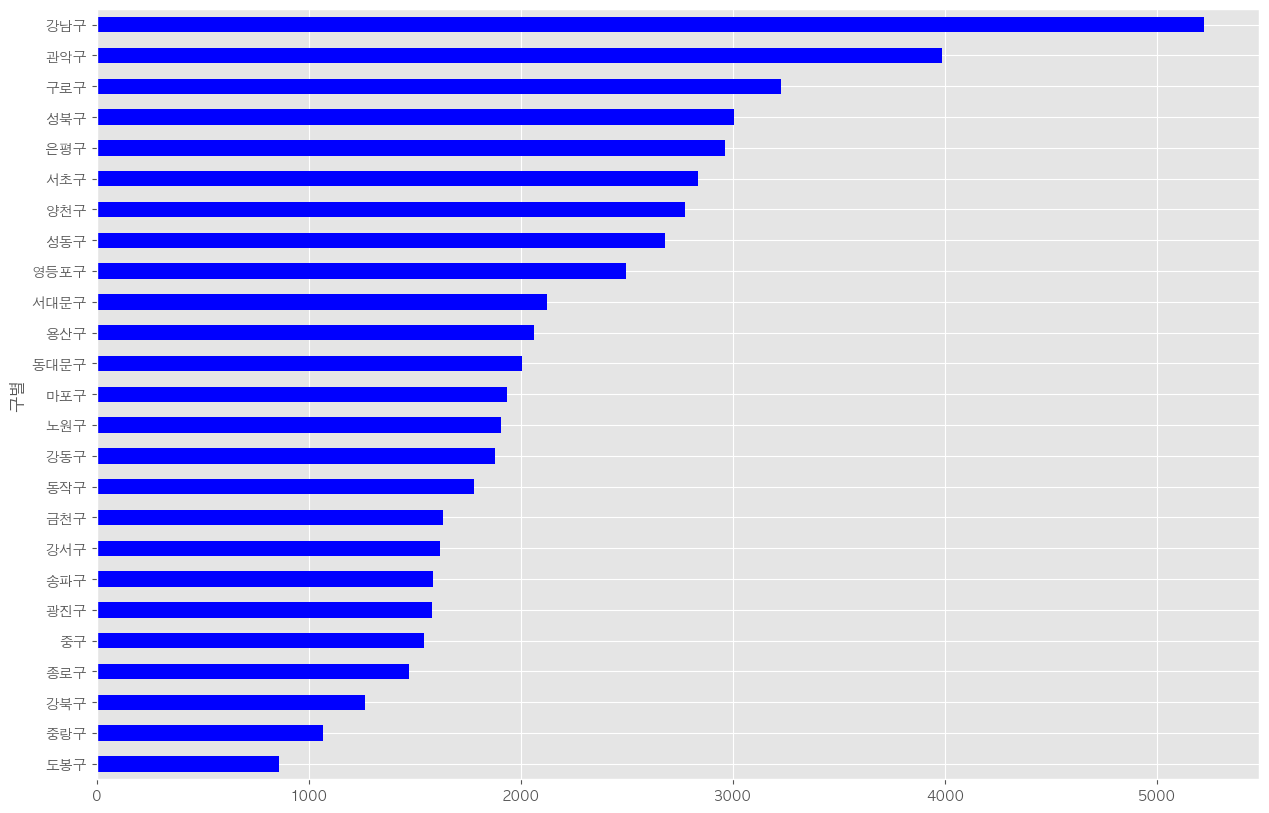

In [53]:
plt.style.use('ggplot')

data_result.sort_values(by='소계')['소계'].plot(
    kind='barh',
    figsize=(15,10),
    color='blue'
)

plt.show()

### 인구 대비 cctv 비율 막대 그래프

In [54]:
data_result['인구대비cctv비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비cctv비율
구별,,,,,,,,,
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462,1.131392
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475,0.616406
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228,0.872090
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251,0.650038
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338,0.431979


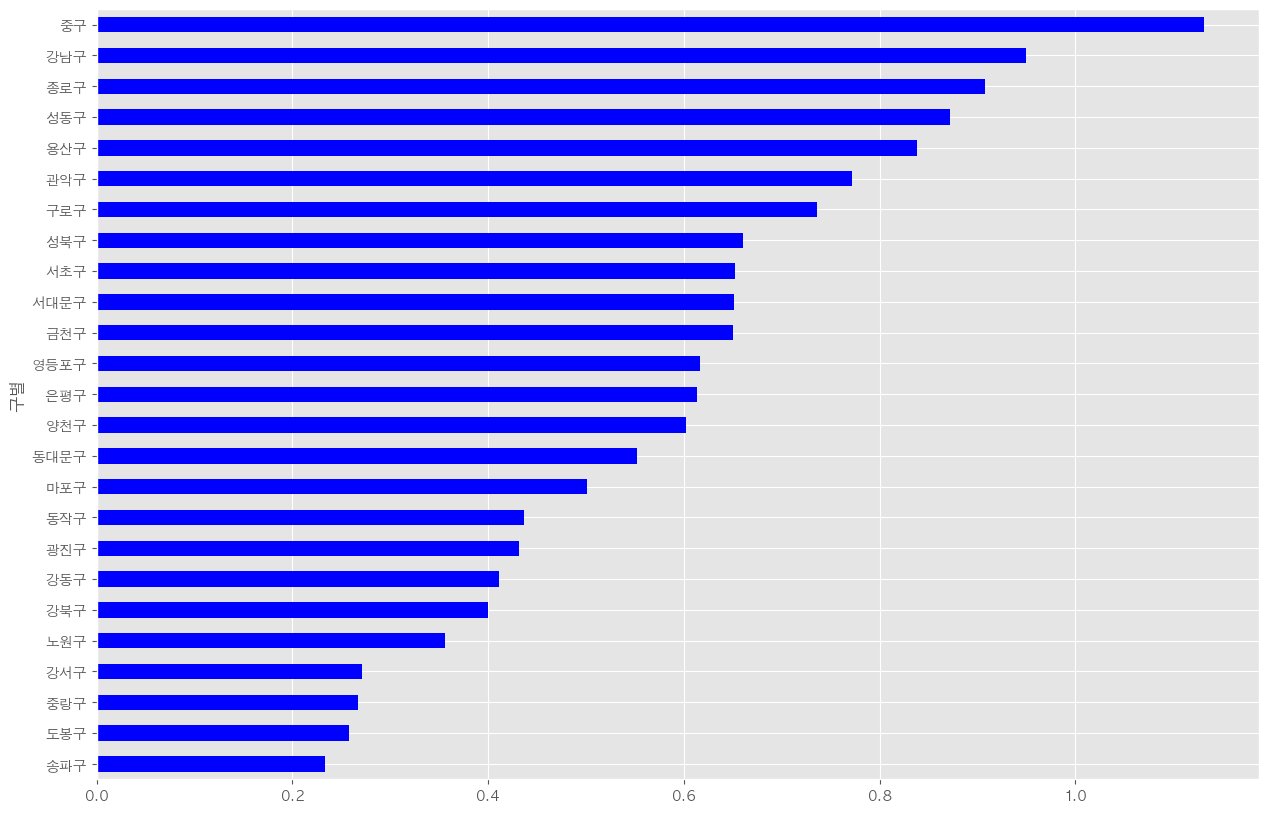

In [55]:
plt.style.use('ggplot')

data_result.sort_values(by='인구대비cctv비율')['인구대비cctv비율'].plot(
    kind='barh',
    figsize=(15,10),
    color='blue'
)

plt.show()

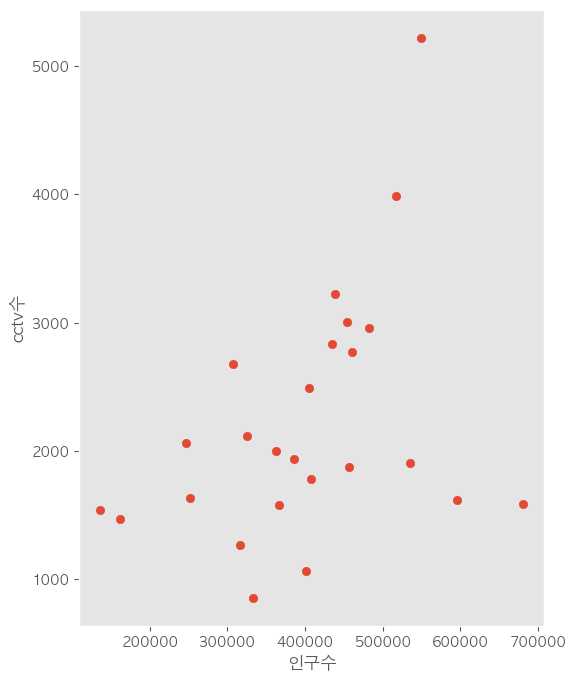

In [56]:
# 산점도를 이용한 시각화
plt.figure(figsize=(6,8))

plt.scatter(
    data_result['인구수'],
    data_result['소계'],
)

plt.xlabel('인구수')
plt.ylabel('cctv수')
plt.grid()

plt.show()

In [57]:
# 인구수 , 소계에 따른 기준선 만들기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)

# 어디서 부터 어디까지 좌표값이다.
fp1

array([2.88522756e-03, 1.06403852e+03])

In [58]:
# y축 데이터
f1 = np.poly1d(fp1)

# x축 데이터
fx = np.linspace(100000,700000)



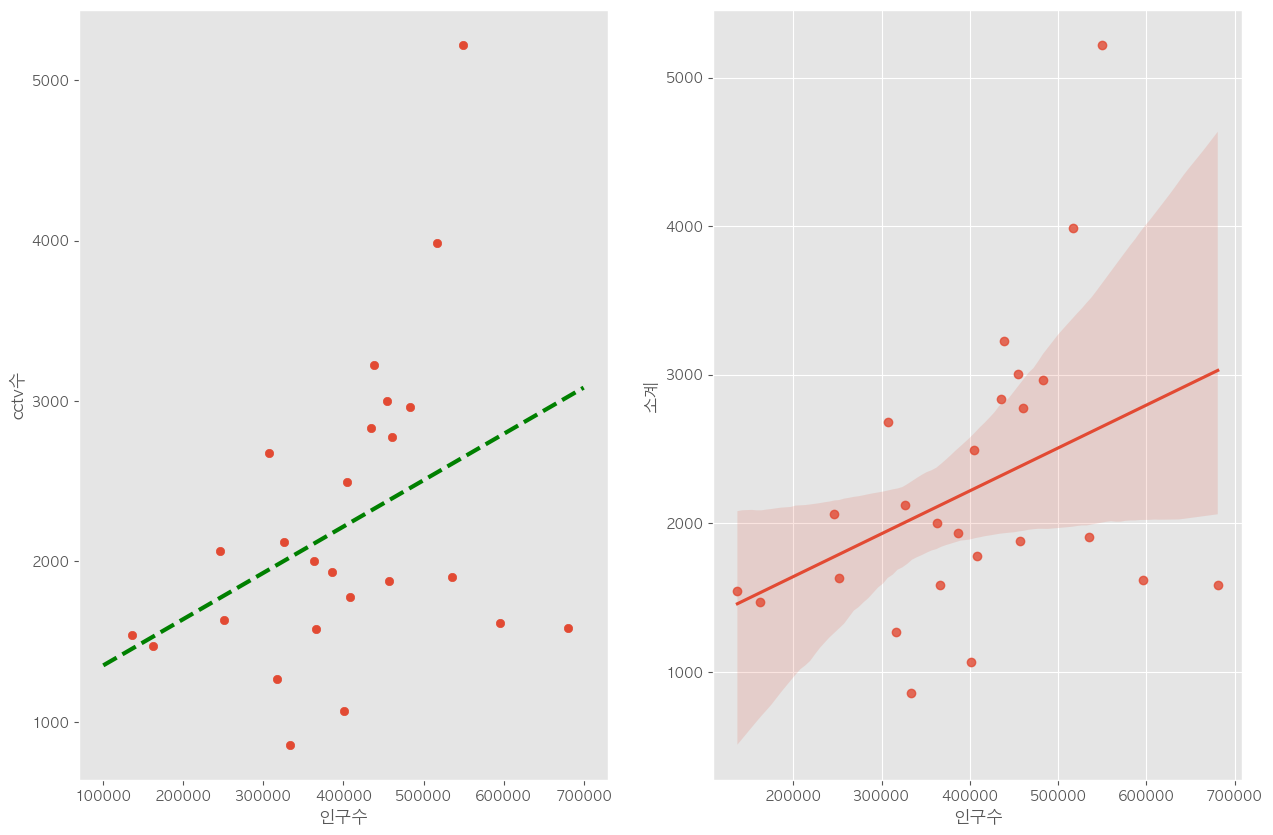

In [59]:
# 산점도를 이용한 시각화
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(
    data_result['인구수'],
    data_result['소계'],
)

ax1.plot(
    fx,
    f1(fx),
    ls='dashed',
    lw=3,
    color='green'
)

sns.regplot(
    x = '인구수',
    y = '소계',
    data = data_result,
    ax=ax2
)

ax1.set_xlabel('인구수')
ax1.set_ylabel('cctv수')
ax1.grid()

plt.show()

---
### 직선과의 오차를 구하는 공식과 오차가 큰 순으로 데이터 정렬 후 그래프 그리기

In [60]:
# 기준선 구하기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)

# y축 : cctv 기준치 구하기
f1 = np.poly1d(fp1)

# x축 데이터 : 인구 수
fx = np.linspace(100000,700000)

# 소계에서 기준인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))


In [61]:
data_result=data_result.sort_values(by='오차')[::-1]

#### 정리 : CCTV 비율과 오차를 보고 cctv가 많이 설치 되었는지 아닌지를 판단할 수 있다. 

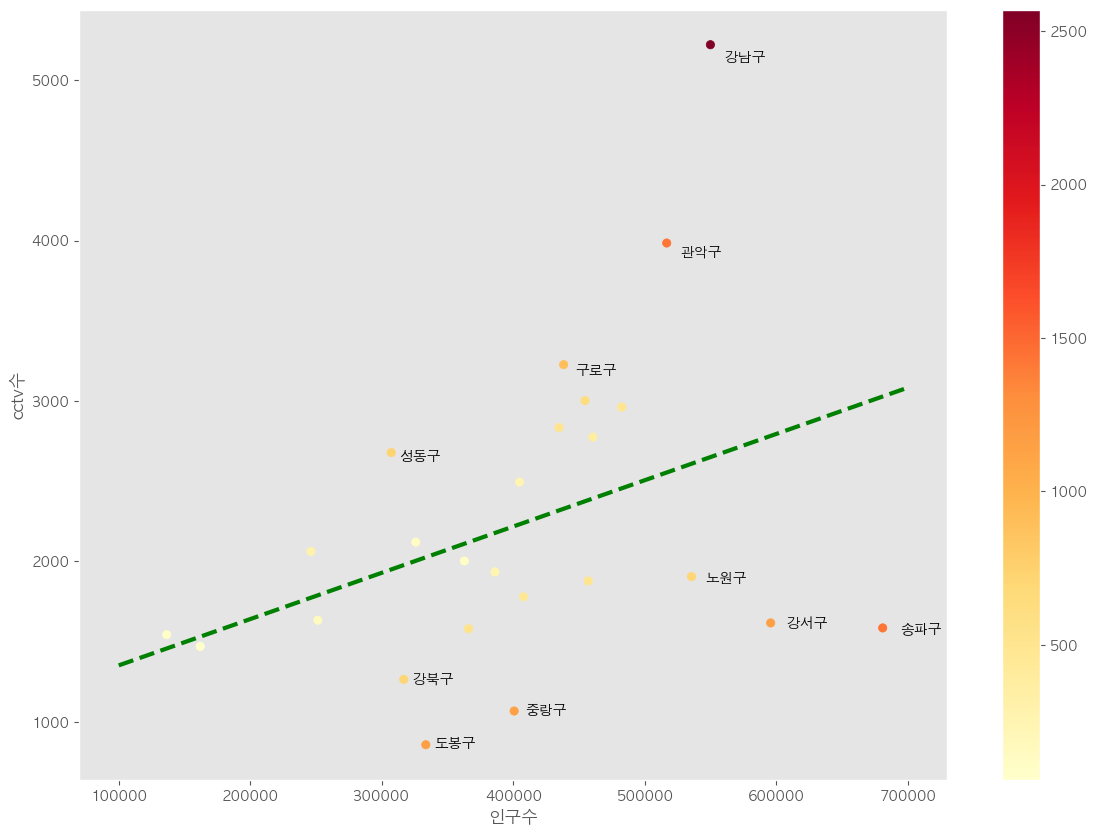

In [62]:
# 그래프에 텍스트와 color 입히기
plt.figure(figsize=(14,10))

plt.scatter(
    data_result['인구수'],
    data_result['소계'],
    c=data_result['오차'],
    cmap='YlOrRd'
)

plt.plot(
    fx,
    f1(fx),
    ls='dashed',
    lw=3,
    color='green'
)

# 오차가 가장 큰 10개 구에 이름 붙이기
for n in range(10):
    plt.text(
        x=data_result['인구수'][n] * 1.02,
        y=data_result['소계'][n] * 0.98,
        s=data_result.index[n]
    )
    


plt.xlabel('인구수')
plt.ylabel('cctv수')
plt.colorbar()
plt.grid()

plt.show()

In [64]:
data_result.to_csv('../Data/cctv_result.csv')